<a href="https://colab.research.google.com/github/hollyisyoon/TIL/blob/main/230317_%EA%B5%B0%EC%A7%91%EB%B6%84%EC%84%9D_%EC%98%88%EC%8B%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/data/Mall_Customers.csv', index_col=0)
data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [ ]:
data.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


##카테고리 변수 처리

In [ ]:
data = pd.get_dummies(data, columns=['Gender'], drop_first=True)
data.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
CustomerID,,,,
1,19,15,39,1
2,21,15,81,1
3,20,16,6,0
4,23,16,77,0
5,31,17,40,0


## K-means Clustering Modeling

In [ ]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)
model.fit(data)
model.labels_

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

## 모델링 결과 확인하기

In [ ]:
result = data.copy()
result['label'] = model.labels_
result.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,label
CustomerID,,,,,
1,19,15,39,1,0
2,21,15,81,1,0
3,20,16,6,0,0
4,23,16,77,0,0
5,31,17,40,0,0


In [ ]:
result.groupby('label').mean()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
label,,,,
0,40.325203,44.154472,49.829268,0.406504
1,40.394737,87.000000,18.631579,0.526316
2,32.692308,86.538462,82.128205,0.461538


In [ ]:
result['label'].value_counts()

0    123
2     39
1     38
Name: label, dtype: int64

In [ ]:
result.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male',
       'label'],
      dtype='object')

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

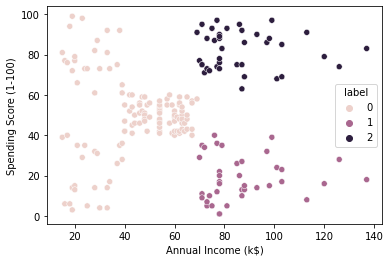

In [ ]:
sns.scatterplot(data=result, x='Annual Income (k$)', y='Spending Score (1-100)', hue='label')

## 최적화된 k찾기

In [25]:
#elbow method

distance = []
for i in range(2,11):
    model = KMeans(n_clusters=i)
    model.fit(data)
    distance.append(model.inertia_)
distance

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

[212889.44245524303,
 143391.59236035674,
 104414.67534220169,
 75399.61541401484,
 58350.65449462818,
 51130.69008126377,
 44389.80767355766,
 40942.51117006117,
 38038.98407866358]

<Axes: >

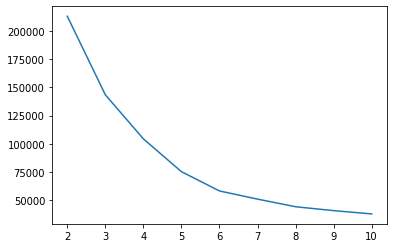

In [26]:
sns.lineplot(x=list(range(2,11)), y=distance)

In [29]:
#silhoutte Score

from sklearn.metrics import silhouette_score

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

<Axes: >

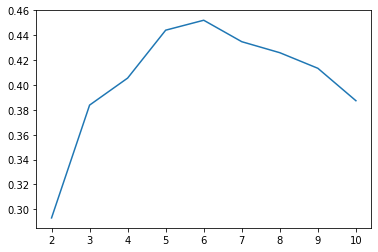

In [30]:
sil=[]

for i in range(2,11):
    model = KMeans(n_clusters=i)
    model.fit(data)
    sil.append(silhouette_score(data, model.labels_))
sns.lineplot(x=list(range(2,11)), y=sil)

In [31]:
model = KMeans(n_clusters = 6)
model.fit(data)
data['label']=model.labels_

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: xlabel='label', ylabel='Age'>

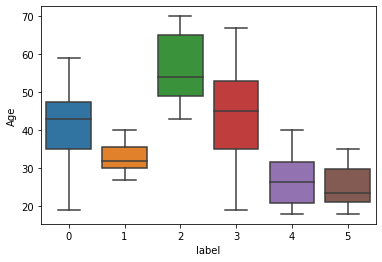

In [34]:
sns.boxplot(x='label', y='Age', data=data)

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

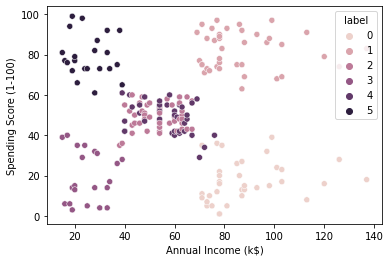

In [35]:
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='label')